Author: Robin Suxdorf

# Deep Learning Approach

## Imports

In [1]:
import os

from sklearn.model_selection import train_test_split

from src.utils import load_config
from main import run_preprocessing_pipeline
from src.models.deep_learning import BinaryNeuralNetworkModel, MultilabelNeuralNetworkModel, MulticlassNeuralNetworkModel
from src.evaluation import evaluate_model

[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1000)>


In [2]:
model_folder_path = "data/models/"

## Binary Classification

In [3]:
config = load_config("deep-learning/dl-binary")

X, y = run_preprocessing_pipeline(config)
y = y["label"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

2025-03-15 23:43:48,389 - src.utils - INFO - Loading config from configs/deep-learning/dl-binary.yaml.
2025-03-15 23:43:48,397 - main - INFO - Loading data from file: loaded_data_binary.csv
2025-03-15 23:43:54,853 - main - INFO - Loading prepocessed data from file: preprocessed_data_binary.csv
2025-03-15 23:43:58,991 - main - INFO - Loading features from file: features_binary.pkl


In [4]:
model_name = "dl_binary.pt"

model = BinaryNeuralNetworkModel(X_train.shape[1])

if model_name in os.listdir(model_folder_path):
    model.load(f"{model_folder_path}{model_name}")
else:  
    model.fit(X_train, y_train, 0.001, 5, 16)

In [5]:
predictions = model.predict(X_test)

2025-03-15 23:44:01,944 - src.evaluation - INFO - Evaluating the model.
2025-03-15 23:44:04,191 - src.evaluation - INFO - Accuracy: 96.06%
2025-03-15 23:44:04,228 - src.evaluation - INFO - Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96      6044
           1       0.95      0.96      0.96      4780

    accuracy                           0.96     10824
   macro avg       0.96      0.96      0.96     10824
weighted avg       0.96      0.96      0.96     10824

2025-03-15 23:44:04,237 - src.evaluation - INFO - Confusion Matrix:
[[5811  233]
 [ 194 4586]]
2025-03-15 23:44:04,375 - src.evaluation - INFO - Evaluation finished.


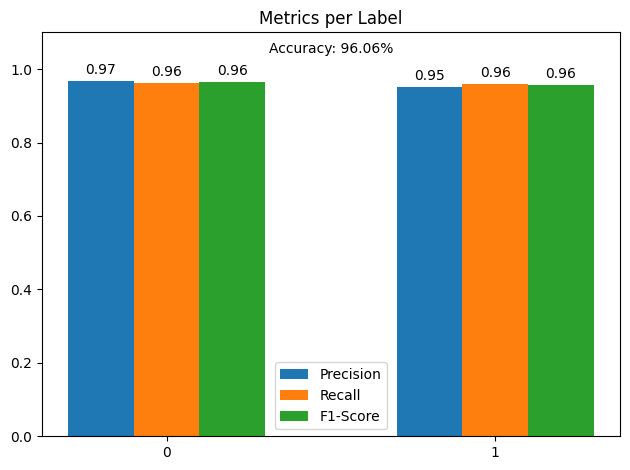

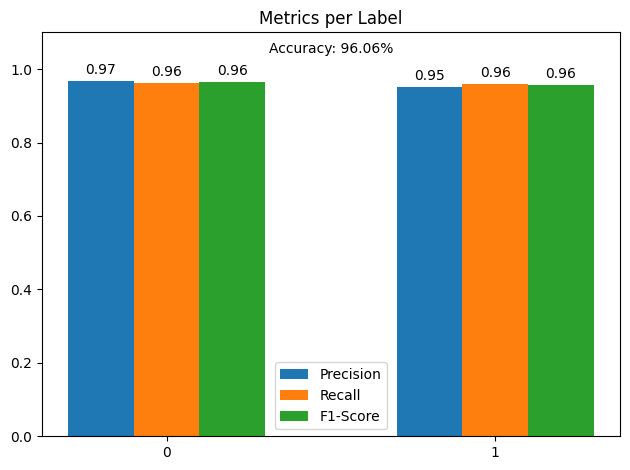

In [6]:
evaluate_model(model, X_test, y_test)

In [7]:
model.save(f"{model_folder_path}{model_name}")

## Multilabel Classification

In [8]:
config = load_config("deep-learning/dl-multilabel")

X, y = run_preprocessing_pipeline(config)
columns = ["advert", "coi", "fanpov", "pr", "resume"]
y = y[columns].values.tolist()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

2025-03-15 23:44:04,997 - src.utils - INFO - Loading config from configs/deep-learning/dl-multilabel.yaml.
2025-03-15 23:44:05,007 - main - INFO - Loading data from file: loaded_data_multilabel.csv
2025-03-15 23:44:06,056 - main - INFO - Loading prepocessed data from file: preprocessed_data_multilabel.csv
2025-03-15 23:44:06,855 - main - INFO - Loading features from file: features_multilabel.pkl


In [9]:
model_name = "dl_multilabel.pt"

model = MultilabelNeuralNetworkModel(X_train.shape[1])

if model_name in os.listdir(model_folder_path):
    model.load(f"{model_folder_path}{model_name}")
else:
    model.fit(X_train, y_train, learning_rate=0.001, num_epochs=5, batch_size=16)

In [10]:
predictions = model.predict(X_test)

2025-03-15 23:44:08,177 - src.evaluation - INFO - Evaluating the model.
2025-03-15 23:44:09,217 - src.evaluation - INFO - Accuracy: 66.00%
2025-03-15 23:44:09,249 - src.evaluation - INFO - Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.89      0.88      3792
           1       0.11      0.05      0.07       401
           2       0.54      0.28      0.37       292
           3       0.09      0.03      0.05       308
           4       0.54      0.50      0.52       439

   micro avg       0.78      0.71      0.74      5232
   macro avg       0.43      0.35      0.38      5232
weighted avg       0.72      0.71      0.71      5232
 samples avg       0.75      0.74      0.73      5232

2025-03-15 23:44:09,275 - src.evaluation - INFO - Confusion Matrix:
[[[ 449  527]
  [ 430 3362]]

 [[4211  156]
  [ 381   20]]

 [[4406   70]
  [ 211   81]]

 [[4354  106]
  [ 298   10]]

 [[4145  184]
  [ 219  220]]]
2025-03-15 23:44:09,395 - s

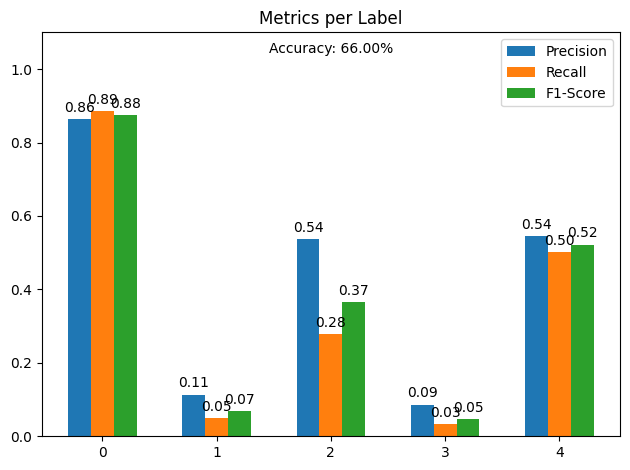

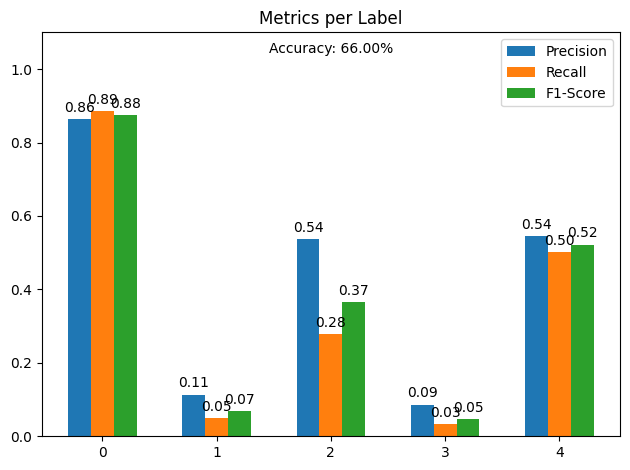

In [11]:
evaluate_model(model, X_test, y_test)

In [12]:
model.save(f"{model_folder_path}{model_name}")

## Augmented Classification

In [13]:
config = load_config("deep-learning/dl-augmented")

X, y = run_preprocessing_pipeline(config)

columns = ["advert", "coi", "fanpov", "pr", "resume"]
y = y[columns].values.tolist()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

2025-03-15 23:44:10,063 - src.utils - INFO - Loading config from configs/deep-learning/dl-augmented.yaml.
2025-03-15 23:44:10,071 - main - INFO - Loading data from file: loaded_data_augmented.csv
2025-03-15 23:44:10,118 - main - INFO - Loading prepocessed data from file: preprocessed_data_augmented.csv
2025-03-15 23:44:10,159 - main - INFO - Loading features from file: features_augmented.pkl


In [14]:
model_name = "dl_augmented.pt"

model = MultilabelNeuralNetworkModel(X_train.shape[1])

if model_name in os.listdir(model_folder_path):
    model.load(f"{model_folder_path}{model_name}")
else:
    model.fit(X_train, y_train, learning_rate=0.001, num_epochs=5, batch_size=16)

In [15]:
predictions = model.predict(X_test)

2025-03-15 23:44:10,383 - src.evaluation - INFO - Evaluating the model.
2025-03-15 23:44:10,425 - src.evaluation - INFO - Accuracy: 70.50%
2025-03-15 23:44:10,436 - src.evaluation - INFO - Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.99      0.89       158
           1       0.00      0.00      0.00        18
           2       0.00      0.00      0.00        12
           3       0.00      0.00      0.00        22
           4       0.00      0.00      0.00        10

   micro avg       0.80      0.71      0.75       220
   macro avg       0.16      0.20      0.18       220
weighted avg       0.58      0.71      0.64       220
 samples avg       0.78      0.74      0.76       220

2025-03-15 23:44:10,440 - src.evaluation - INFO - Confusion Matrix:
[[[  4  38]
  [  2 156]]

 [[182   0]
  [ 18   0]]

 [[188   0]
  [ 12   0]]

 [[178   0]
  [ 22   0]]

 [[190   0]
  [ 10   0]]]
2025-03-15 23:44:10,537 - src.evaluation - INFO

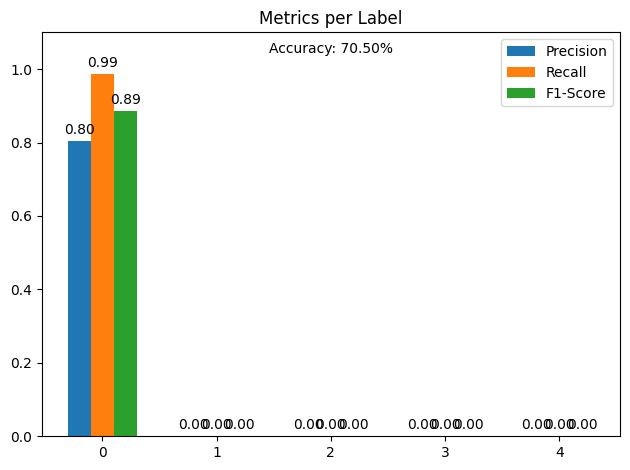

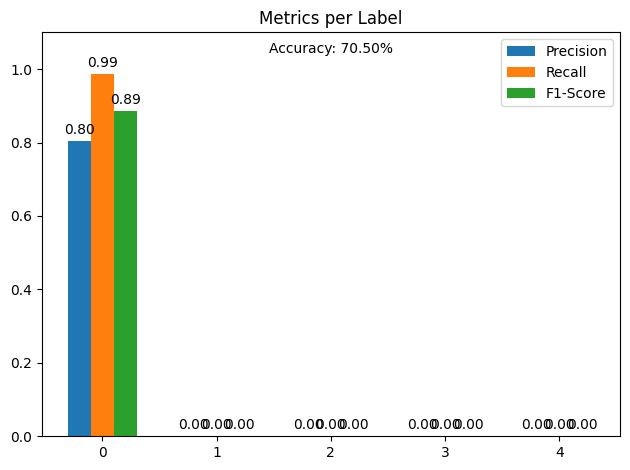

In [16]:
evaluate_model(model, X_test, y_test)

In [17]:
model.save(f"{model_folder_path}{model_name}")

## Wikipedia-Dump

In [18]:
config = load_config("deep-learning/dl-wp-binary")

X, y = run_preprocessing_pipeline(config)

y = y["label"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

2025-03-15 23:44:11,123 - src.utils - INFO - Loading config from configs/deep-learning/dl-wp-binary.yaml.
2025-03-15 23:44:11,132 - main - INFO - Loading data from file: loaded_data_wp_binary.csv
2025-03-15 23:44:43,013 - main - INFO - Loading prepocessed data from file: preprocessed_data_wp_binary.csv
2025-03-15 23:45:04,702 - main - INFO - Loading features from file: features_wp_binary.pkl


In [19]:
model_name = "dl_wp_binary.pt"

model = MulticlassNeuralNetworkModel(X_train.shape[1])

if model_name in os.listdir(model_folder_path):
    model.load(f"{model_folder_path}{model_name}")
else:
    model.fit(X_train, y_train, 0.001, 5, 16)

In [20]:
predictions = model.predict(X_test)

2025-03-15 23:45:10,721 - src.evaluation - INFO - Evaluating the model.
2025-03-15 23:45:14,676 - src.evaluation - INFO - Accuracy: 88.76%
2025-03-15 23:45:14,718 - src.evaluation - INFO - Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      5942
           1       0.87      0.89      0.88      6060
           2       0.88      0.81      0.84      5998

    accuracy                           0.89     18000
   macro avg       0.89      0.89      0.89     18000
weighted avg       0.89      0.89      0.89     18000

2025-03-15 23:45:14,727 - src.evaluation - INFO - Confusion Matrix:
[[5770   42  130]
 [ 151 5364  545]
 [ 416  739 4843]]
2025-03-15 23:45:14,854 - src.evaluation - INFO - Evaluation finished.


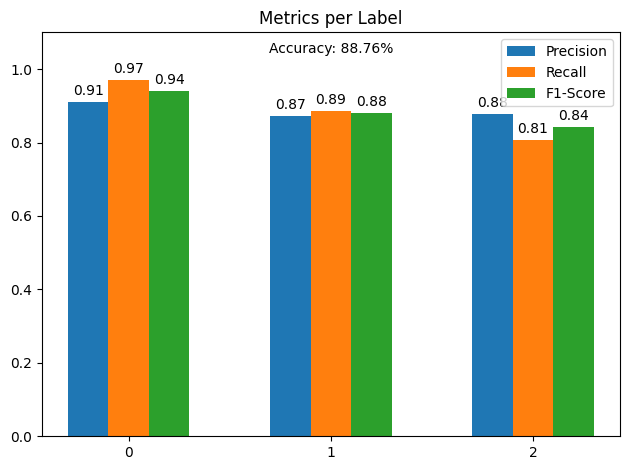

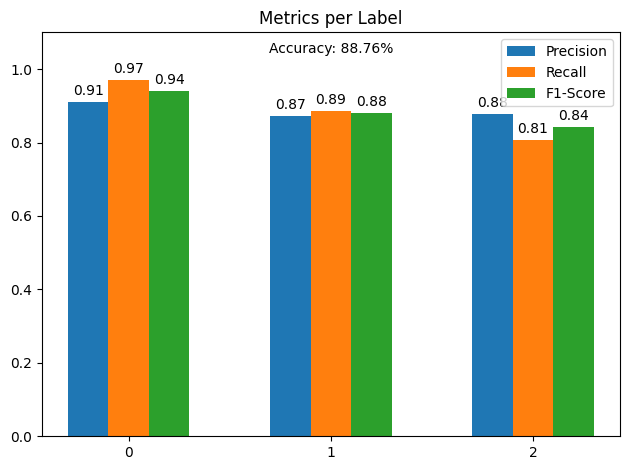

In [21]:
evaluate_model(model, X_test, y_test)

In [22]:
model.save(f"{model_folder_path}{model_name}")